In [1]:
import pandas as pd
import numpy as np

sales_df=pd.read_csv('./diabetes_clean.csv')
sales_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
import numpy as np

# Create X from the radio column's values (.values to make sure they are numpy array)
X = sales_df[['bmi','age']].values

# Create y from the sales column's values
y = sales_df['diabetes'].values

# Reshape X
# X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(768, 2) (768,)


Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

Instructions
100 XP
Import confusion_matrix and classification_report.
Fit the model to the training data.
Predict the labels of the test set, storing the results as y_pred.
Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [20]:

# Import confusion matrix
from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
     

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



Building a logistic regression model
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

Instructions
100 XP
Import LogisticRegression.
Instantiate a logistic regression model, logreg.
Fit the model to the training data.
Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.

In [21]:

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.5070309  0.2621656  0.16851245 0.17314983 0.48962511 0.75732791
 0.06118489 0.5155887  0.3488152  0.77754421]


The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

Instructions 1/2
50 XP
Import roc_curve.
Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
Plot true positive rate against false positive rate.

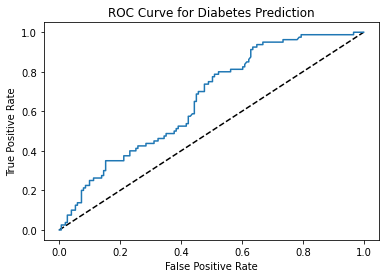

In [28]:
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()
# Well done! The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

In [29]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.6591059602649006
[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



# Hyperparameter tuning with GridSearchCV
Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.

Instructions
100 XP
Import GridSearchCV.
Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
Fit the grid search object to the training data to perform a cross-validated grid search.



In [53]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# import lasso
from sklearn.linear_model import Lasso
# import kfolds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}
lasso = Lasso()
# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.17325351425055813


In [73]:


# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# imprt and Instantiate the RandomizedSearchCV object
from sklearn.model_selection import RandomizedSearchCV
logreg_cv = RandomizedSearchCV(logreg, params, cv = kf)
# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.5714714285714285, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.19183673469387758}
Tuned Logistic Regression Best Accuracy Score: 0.7019383869851159


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\